ME 535 winter 2020

# Yao-Chung Liang 1826630
# Homework 1 

Due Wednesday 15 January 2020

Submit your responses to the following questions as a Jupyter notebook (.ipynb) and as a PDF file via the class Canvas site.

0)  __This initial item is a repeat from the announcement posted yesterday, so you may have already done it.__

- a) Download and install Anaconda software (including python, Jupyter notebook and JupyterLab) from https://www.anaconda.com/distribution/
<br>At the bottom of the page, you can select whether you need the Windows, Linux, or Mac version.
<br>Be sure to get the Python 3.7 version (since support for Python 2.X is about to end)
<br>Once you have installed the Anaconda software, you will be able to open, view, execute, and edit the Jupyter notebooks whose live content make them generally more interesting and useful than PDFs (which are handy for quick views of content).

- b) Work through the "Ch1_intro" notebook as you read through Ch. 1 in the text.

The problems below aim to help you build your python skills by implementing an embellishment of the "toy" floating point number system discussed in class. This will provide the opportunity to write and execute several functions using essential control structures. 

Recall that the "toy" system was characterized by the following parameter values: $\beta=2, p=2, e \in {-1,0,1,2,3}$. 

Here we embellish slightly by adding 1 digit of precision to get: $\beta=2, p=3, e \in {-1,0,1,2,3}$

1a) Write a function (by completing the template below) that computes the represented number corresponding to a specific set of parameter values:

In [1]:
def params_to_num(sign_bit, digits, exponent, base=2):
    """
    compute the numerical value corresponding to floating point parameter values
    
    Args:
        sign_bit: 0 for positive, 1 for negative
        digits: list of integer digits in range[0,base]
        exponent: integer exponent value
    Named args:
        base: default value 2
    
    Returns:
        float value of represented number
    """
    
    #insert code here
    temp = 0
    for i in range(len(digits)):
        temp += digits[i]/(base**i)    
    return temp*(-1**sign_bit)*(base**exponent)

1b) Test your implementation by checking that `params_to_num(1, [1,0,1], 3)` returns the value `-10.0`.

In [2]:
-10.0 == params_to_num(1, [1,0,1], 3)

True

2a) Write a function (by completing the template below) to compute the number of entries in the array of all normalized representable values in a floating point system. Remember that the first digit in a normalized number must be non-zero. The other digits are integers satisfying $0 \leq d < \beta$.

In [3]:

def gamut_size(p, e_min, e_max, base=2):
    """
    compute the number of representable values for a floating point system
    
    Args:
        p: number of digits of precision
        e_min: smallest integer exponent value
        e_min: largest integer exponent value
    Named args:
        base: default value 2
    
    Returns:
        integer number of representable values
    """
    
    #insert code here    
    return base**(p-1)*(base-1)*(e_max-e_min+1)*2

In [4]:
# testing my gamut_size function works fine
print(gamut_size(2,-2,3))

24


2b) Write a function (by completing the template below) to produce a numpy array containing the sorted array of normalized representable numbers for a floating point system with $p=3$ digits of precision. 
<br>__Hints__: 
<br>Remember to import numpy to have access to array capabilities.
<br>Start by computing the number of elements in the gamut so you can create an array of the appropriate size.
<br>Use `numpy.sort()` so you do not have to write your own sorting function.

In [5]:
import numpy as np
import copy
def gamut( e_min, e_max, base=2):
    """
    compute the representable values for a floating point system
    
    Args:
        p: number of digits of precision
        e_min: smallest integer exponent value
        e_min: largest integer exponent value
    Named args:
        base: default value 2
    
    Returns:
        numpy array of representable values
    """
    #insert code here
    p = 3
    def strTofloat(tar,b):
        res = 1
        for i in range(2,len(tar)):
            res += float(tar[i])/(b**(i-1))
        return res
    
    b = base 
    vals = []
    que = []
    for i in range(1,b):
        que.append(str(i)+'.')
        
    while len(que) < b**(p-1)*(b-1):
        qlen = len(que)
        for _ in range(qlen):
            temp = que.pop(0)
            ano_temp = copy.deepcopy(temp)
            for j in range(b):
                temp += str(j)
                if len(temp) > p+1:
                    raise NameError("Too much precision")
                que.append(temp)
                temp = copy.deepcopy(ano_temp)
                
        
    for e in range(e_min,e_max+1):
         for i in que:
                float_i = strTofloat(i,b)
                vals.append(float_i*(b**e))
                vals.append(-float_i*(b**e))
    vals = np.asarray(vals)
    vals = np.sort(vals) #sort the array
    return vals

3b) Evaluate `X = gamut(-2,3)` and output the representable set.

In [6]:
X = gamut(-2,3)
print("representable set X:")
X

representable set X:


array([-14.    , -12.    , -10.    ,  -8.    ,  -7.    ,  -6.    ,
        -5.    ,  -4.    ,  -3.5   ,  -3.    ,  -2.5   ,  -2.    ,
        -1.75  ,  -1.5   ,  -1.25  ,  -1.    ,  -0.875 ,  -0.75  ,
        -0.625 ,  -0.5   ,  -0.4375,  -0.375 ,  -0.3125,  -0.25  ,
         0.25  ,   0.3125,   0.375 ,   0.4375,   0.5   ,   0.625 ,
         0.75  ,   0.875 ,   1.    ,   1.25  ,   1.5   ,   1.75  ,
         2.    ,   2.5   ,   3.    ,   3.5   ,   4.    ,   5.    ,
         6.    ,   7.    ,   8.    ,  10.    ,  12.    ,  14.    ])

3a) Write a function that rounds a floating point input to the nearest value in the array `X` of representable values (by completing the template below):

In [7]:
def my_round(x, gamut):
    """
    round a number to the nearest element of an array of ordered values
    
    Args:
        x: input numeric value
        gamut: ordered array of representable numerical values
    
    Returns:
        element of gamut closest to x
    """
    
    # insert code here
    gamut = gamut[len(gamut)//2:]
    sign = None
    
    if x>=0:
        sign = 1
    else:
        sign = -1
    
    if abs(x)<= gamut[0]/2:
        return 0
    elif abs(x) <= gamut[0] and abs(x) > gamut[0]/2:
        return sign*gamut[0]
    
    if abs(x) >= gamut[-1]*2:
        if sign:
            return 'inf'
        else:
            return '-inf'
    elif abs(x) >= gamut[-1] and abs(x) < gamut[-1]*2:
        return sign*gamut[-1]
    
    for i in range(0,len(gamut)-1):
        if abs(x) == gamut[i]:
            return sign*gamut[i]
        elif abs(x) > gamut[i] and abs(x) < gamut[i+1]:
            if abs(abs(x)-gamut[i]) < abs(abs(x)-gamut[i+1]):
                return sign*gamut[i]
            else:
                return sign*gamut[i+1]
    return sign*gamut[-1]

3b) Execute `my_round(9.5, X)` verify that the return value is `10.0`.

In [8]:
10.0 == my_round(9.5, X)

True

5a) Compute the absolute error in the rounded representation of 250 values of x equally spaced across the interval $[-15,15]$.

In [9]:
x_250 = np.linspace(-15,15,250)

abs_errs = []
for i in x_250:
    appr = my_round(i,X)
    abs_errs.append(abs(appr - i))

5b) Plot the absolute error as computed in 5a.

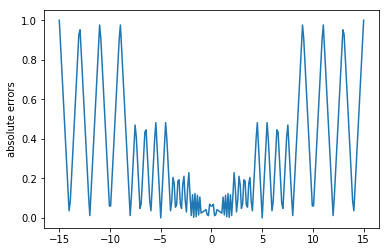

In [13]:
import matplotlib.pyplot as plt
#%matplotlib inline 
#magic command above makes plot show up in notebook

#insert additional code here
x = np.linspace(-15.0,15.0, num=250, endpoint=True)
plt.plot(x,abs_errs)
plt.ylabel('absolute errors')
plt.show()

6a) Compute the relative error in the rounded representation of 100 values of x equally spaced across the interval $[-15,15]$.

In [11]:
x_100 = np.linspace(-15,15,100)
rel_errs = []
for i in x_100:
    appr = my_round(i,X)
    if i != 0:
        rel_errs.append(abs(i - appr)/abs(i))
    else:
        rel_errs.append(0)
        #rel_errs.append(abs(i - appr)/1)

6b) Plot the relative error as computed in 5a.

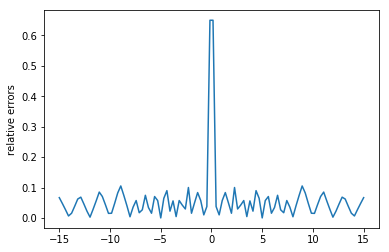

In [12]:
import matplotlib.pyplot as plt
#%matplotlib inline 
#magic command above makes plot show up in notebook

#insert additional code here
x = np.linspace(-15.0,15.0, num=100, endpoint=True)
plt.plot(x,rel_errs)
plt.ylabel('relative errors')
plt.show()

6c) What is machine epsilon for this floating point system? Explain how you arrived at your answer and how that answer relates to your plot of relative error.

- 6c) Answer: If the floating-point number
<br>$(-1)^s \; (d_0.d_1 d_2 \ldots d_{p-1}) \; \beta^e$
is used to represent z
<br>it is in error by |$ d_0.d_1 d_2 \ldots d_{p-1} -\; (z/\beta^{e})$|$\beta^{p-1}$ units in the last place.
<br>If the result of a calculation is the floating-points number nearest to the correst result, it is still might be in error by as much as 1/2 units in the last place. That is to say, the machine epsilon would be $\beta^{-p+1}/2$.
<br>In the toy number system, p = 3 and $\beta$ = 2, thus the machine epsilon $\epsilon$ = $2^{-3+1}$ /2 = 0.125
<br>Thus, those values close or in to the region [-0.125, 0.125] will result in tremendous floating-point error.
<br>This is the relation between machine epsilon and relative error. 